In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz as sv
import warnings

In [37]:
# Loading data
df = pd.read_csv('AB_NYC_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
print('Number of rows:',df.shape[0])
print('Number of columns:',df.shape[1])

Number of rows: 48895
Number of columns: 16


In [14]:
print('Percentage of missing observations: \n', df.isnull().sum()*100/len(df))

Percentage of missing observations: 
 id                                 0.000000
name                               0.032723
host_id                            0.000000
host_name                          0.042949
neighbourhood_group                0.000000
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       20.558339
reviews_per_month                 20.558339
calculated_host_listings_count     0.000000
availability_365                   0.000000
dtype: float64


The percentage of missing data on last_review and reviews per month is approximately 20%, will treat it later.

In [15]:
#five point summary
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [3]:
#sweet viz
my_report = sv.analyze(df,target_feat='price')
my_report.show_html()


Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [4]:
my_report = sv.analyze(df)
my_report.show_html()


Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64


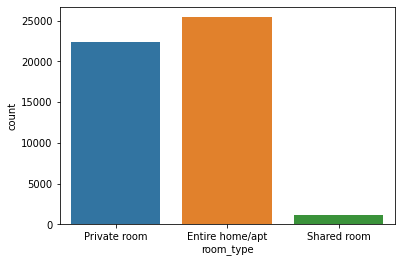

In [16]:
# Types of room:
print(df.room_type.value_counts())
sns.countplot(df.room_type)
plt.show()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64


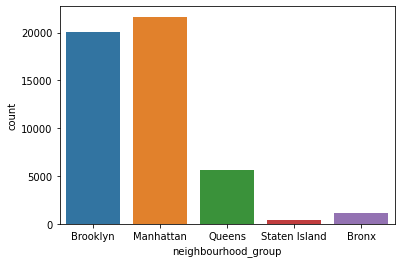

In [17]:
# Number of Airbnbs in each location
print(df["neighbourhood_group"].value_counts())
sns.countplot(df.neighbourhood_group)
plt.show()


- Since there is such a large gap between Queens , Staten Island and Bronx . I'd say that these are probably Industrial or regions where there are not that many Tourist atrractions .
- People who might be wanting to set up a Leasing Business , would quite obviously have more frequent visitors , in Manhattan , Brooklyn and Queens .

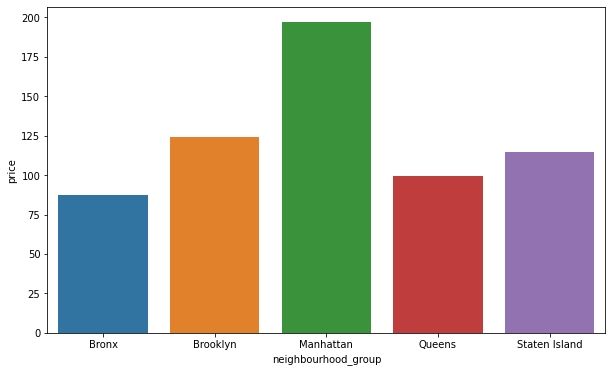

In [18]:
# Analyzing neighbourhood with prices
avg_=df.groupby('neighbourhood_group',as_index=False)['price'].mean()
plt.figure(figsize=(10,6))
sns.barplot(avg_['neighbourhood_group'], avg_['price'])

As per the obvservation, we can clearly state that manhattan has the highest mean price.

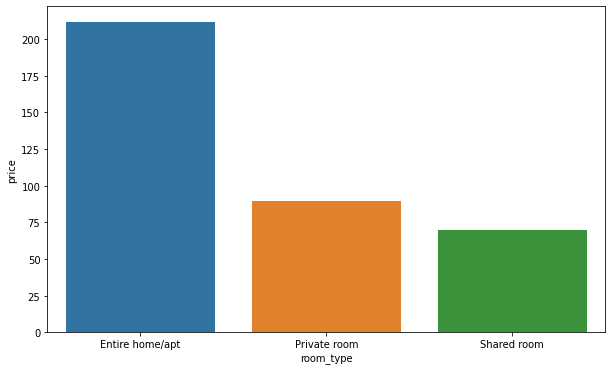

In [19]:
# Analyzing neighbourhood with prices
avg_=df.groupby('room_type',as_index=False)['price'].mean()
plt.figure(figsize=(10,6))
sns.barplot(avg_['room_type'], avg_['price'])

Entire home/Apt has the highest mean price.

0                       Clean & quiet apt home by the park
1                                    Skylit Midtown Castle
2                      THE VILLAGE OF HARLEM....NEW YORK !
3                          Cozy Entire Floor of Brownstone
4         Entire Apt: Spacious Studio/Loft by central park
                               ...                        
48890      Charming one bedroom - newly renovated rowhouse
48891        Affordable room in Bushwick/East Williamsburg
48892              Sunny Studio at Historical Neighborhood
48893                 43rd St. Time Square-cozy single bed
48894    Trendy duplex in the very heart of Hell's Kitchen
Name: name, Length: 48895, dtype: object


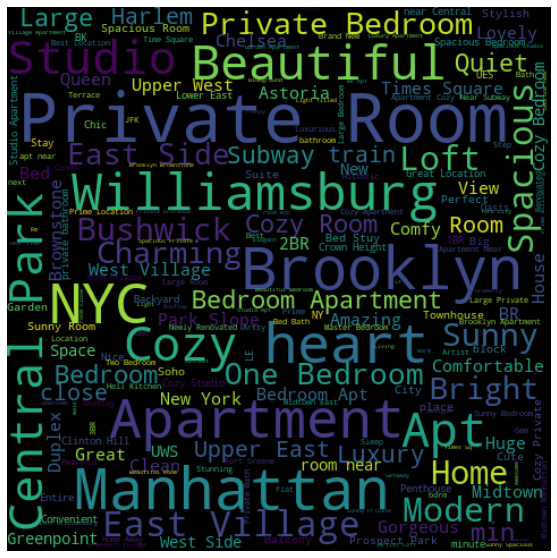

In [20]:
airbnb_names = df["name"]
print(airbnb_names)
from wordcloud import WordCloud
 
# Create a list of word
listing_names = ""
for items in airbnb_names.iteritems():
    listing_names += str(items[1]) + " "
 
# Create the wordcloud object
wordcloud = WordCloud(width=480, height=480, margin=0).generate(listing_names)
 
# Display the generated image:
plt.figure(figsize =(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

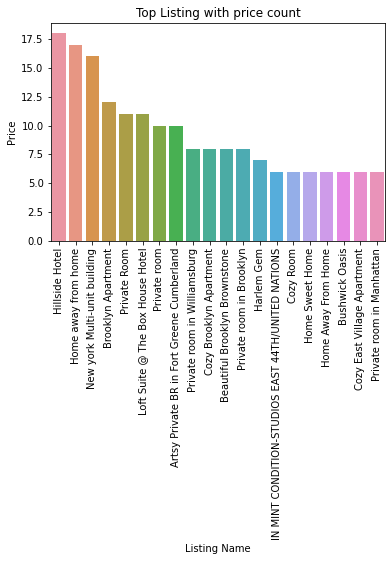

In [21]:
x1 = df.groupby('name')["price"].count().sort_values(ascending=False).head(20)
sns.barplot(x1.index, x1)
plt.title('Top Listing with price count')
plt.ylabel('Price')
plt.xlabel('Listing Name')
plt.xticks(rotation = 90)

0                 John
1             Jennifer
2            Elisabeth
3          LisaRoxanne
4                Laura
             ...      
48890          Sabrina
48891          Marisol
48892    Ilgar & Aysel
48893              Taz
48894       Christophe
Name: host_name, Length: 48895, dtype: object


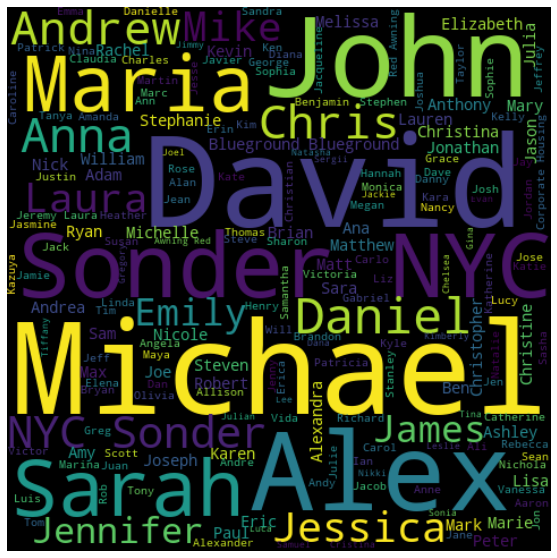

In [22]:
airbnb_host = df["host_name"]
print(airbnb_host)
from wordcloud import WordCloud
 
# Create a list of word
host_names = ""
for items in airbnb_host.iteritems():
    host_names += str(items[1]) + " "
 
# Create the wordcloud object
wordcloud = WordCloud(width=480, height=480, margin=0).generate(host_names)
 
# Display the generated image:
plt.figure(figsize =(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

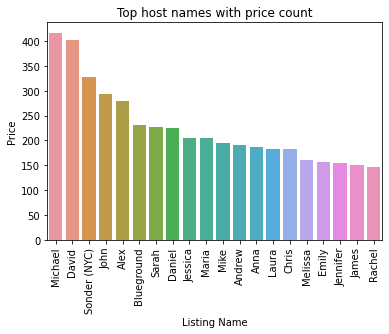

In [23]:
x1 = df.groupby('host_name')["price"].count().sort_values(ascending=False).head(20)
sns.barplot(x1.index, x1)
plt.title('Top host names with price count')
plt.ylabel('Price')
plt.xlabel('Listing Name')
plt.xticks(rotation = 90)

The Above barplot shows us the top 10 listing names and host names according to the price count.We have also displayed the word cloud of listing name and host name. We get similar results with both the wordcloud and barplots. But we will further try and analyse if the name of the listing and host have an effect on price in next section

In [24]:
# Selecting top 10 reviews
top = df.nlargest(10,'number_of_reviews')
top

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
11759,9145202,Room near JFK Queen Bed,47621202,Dona,Queens,Jamaica,40.66730,-73.76831,Private room,47,1,629,2019-07-05,14.58,2,333
2031,903972,Great Bedroom in Manhattan,4734398,Jj,Manhattan,Harlem,40.82085,-73.94025,Private room,49,1,607,2019-06-21,7.75,3,293
2030,903947,Beautiful Bedroom in Manhattan,4734398,Jj,Manhattan,Harlem,40.82124,-73.93838,Private room,49,1,597,2019-06-23,7.72,3,342
2015,891117,Private Bedroom in Manhattan,4734398,Jj,Manhattan,Harlem,40.82264,-73.94041,Private room,49,1,594,2019-06-15,7.57,3,339
13495,10101135,Room Near JFK Twin Beds,47621202,Dona,Queens,Jamaica,40.66939,-73.76975,Private room,47,1,576,2019-06-27,13.40,2,173
10623,8168619,Steps away from Laguardia airport,37312959,Maya,Queens,East Elmhurst,40.77006,-73.87683,Private room,46,1,543,2019-07-01,11.59,5,163
1879,834190,Manhattan Lux Loft.Like.Love.Lots.Look !,2369681,Carol,Manhattan,Lower East Side,40.71921,-73.99116,Private room,99,2,540,2019-07-06,6.95,1,179
20403,16276632,Cozy Room Family Home LGA Airport NO CLEANING FEE,26432133,Danielle,Queens,East Elmhurst,40.76335,-73.87007,Private room,48,1,510,2019-07-06,16.22,5,341
4870,3474320,Private brownstone studio Brooklyn,12949460,Asa,Brooklyn,Park Slope,40.67926,-73.97711,Entire home/apt,160,1,488,2019-07-01,8.14,1,269
471,166172,LG Private Room/Family Friendly,792159,Wanda,Brooklyn,Bushwick,40.70283,-73.92131,Private room,60,3,480,2019-07-07,6.70,1,0


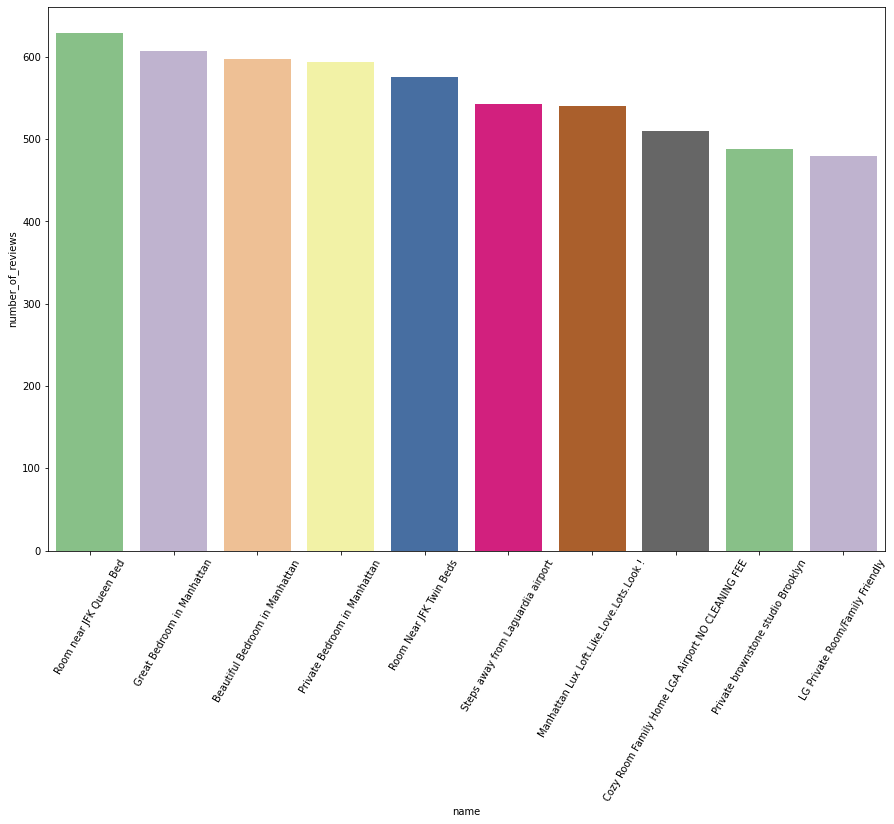

In [25]:
# visualizing top 10 listing as per highest number of reviews received 
plt.figure(figsize=(15,10))
plt.xticks(rotation=60)
sns.barplot(top['name'], top['number_of_reviews'], palette='Accent')

We can infer that top reviews have come from the area Herlem and most of the people have opted for a Private room and most reviews are from Room near JFK Queen Bed which is from Jamaica neighbourhood.

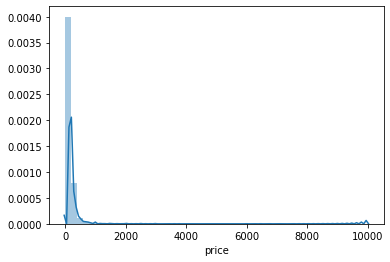

In [26]:
# Price
sns.distplot(df['price'])
plt.show()

The price seems to be unevenly distributed.

In [27]:
df1 = df.copy()

Will consider droping last review column as it has 20% missing value and its just a date of last review given. It also has a neglible correlation with our target variable. Hence. will drop the feature.

In [28]:
df.drop('last_review', axis=1, inplace =True)
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [29]:
# Checking for duplicate values
df.duplicated().sum()

0

In [30]:
# checking for free listing.
free = len(df[df.price == 0])
free

11

We have 11 listing which has price as 0. we are not interested in free listing as it wont help us in our prediction.

In [31]:
# Dropping rows were price of the listing is 0.
df = df[df.price != 0].copy()

In [32]:
df.shape

(48884, 15)

In [33]:
#fill missing values for last review and reviews per month with 0
df["reviews_per_month"] = df["reviews_per_month"].fillna(0)

In [34]:
# Replacing missing values in host name and listing name with none
df[["name", "host_name"]] = df[["name", "host_name"]].fillna("None")

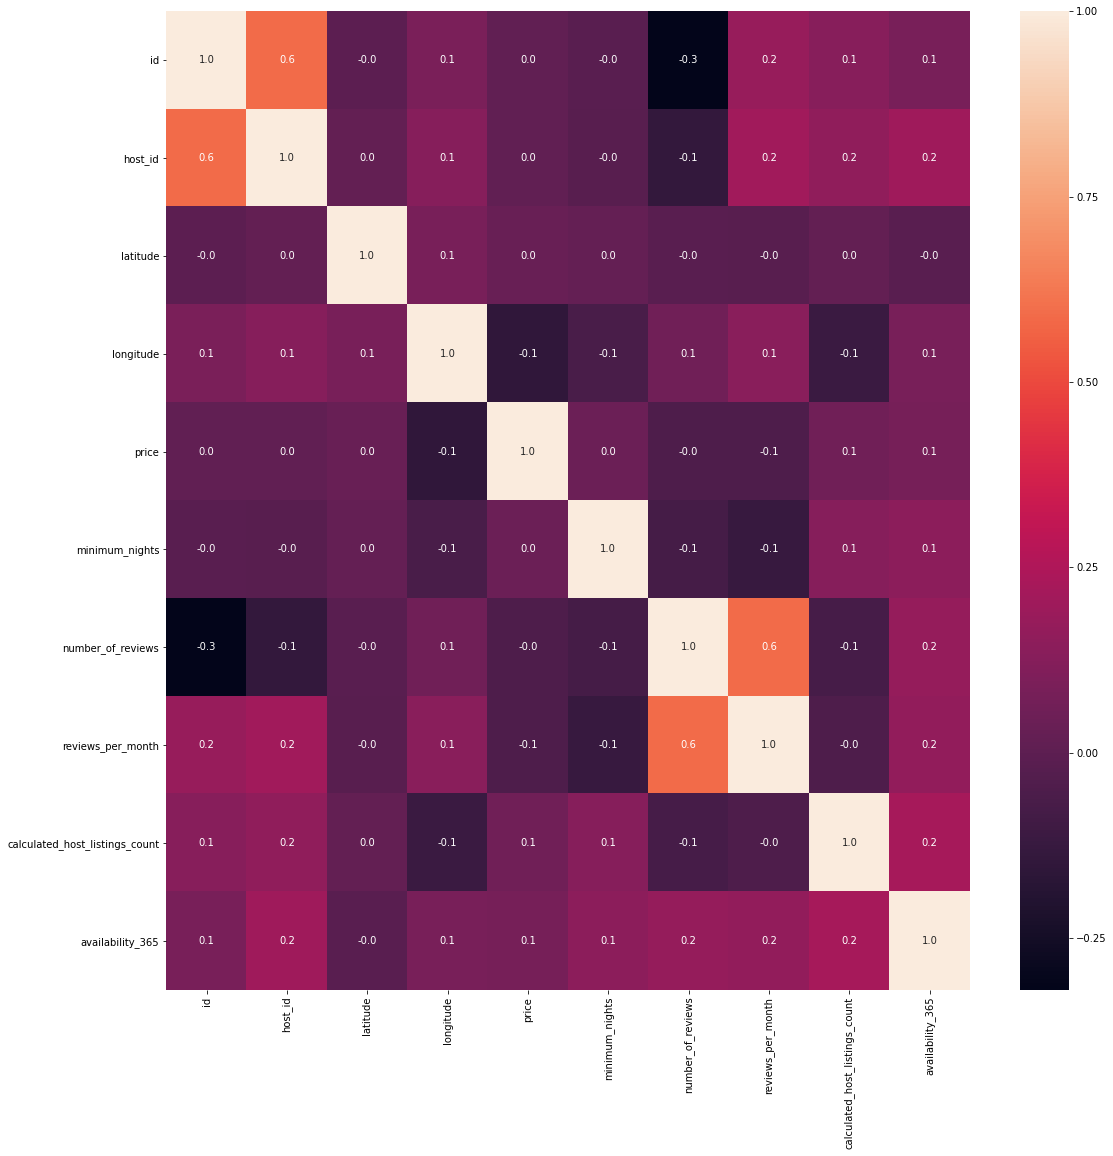

In [35]:
f,ax=plt.subplots(figsize=(18,18))
sns.heatmap(df.corr(),annot=True,fmt='.1f',ax=ax)
plt.show()